In [17]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [18]:
os.listdir("/home/ec2-user/hackathon_data/")

['classC_ship2_MPDE.csv',
 'Collection_Sheet_HACKtheMACHINE.docx',
 '.ipynb_checkpoints',
 'classC_ship1_SSDGV2.csv',
 'classA_ship1_allGTG.csv',
 'classB_ship2_allGTM.csv',
 'classC_ship2_MRG.csv',
 'classB_ship2_allMRG.csv',
 'classC_ship2_SSDG.csv',
 'Data_Dictionary.xlsx',
 'classC_ship1_MPDE.csv',
 'classA_ship1_allMRG.csv',
 'classC_ship1_MRG.csv']

In [19]:
data = {}
path = "/home/ec2-user/hackathon_data/"
prefix = "classC_ship2"

for f in os.listdir(path):
    if f.startswith(prefix) and f.endswith(".csv"):
        print("Parsing file: " + f)
        data[f] = pd.read_csv(path + f)

Parsing file: classC_ship2_MPDE.csv
Parsing file: classC_ship2_MRG.csv
Parsing file: classC_ship2_SSDG.csv


In [20]:
df = data['classC_ship2_MPDE.csv']
print(len(df))
print(len(df.drop_duplicates()))
df = df.drop_duplicates()

667640
159014


In [21]:
df.set_index('DateTime')

,Indicator,1A RKR LO SPLY PRES,2A CYL 8 EXHAUST TEMP,1B L BANK AIR TEMP,2A JW INLET PRESS,1A L BANK AIR TEMP,1B BRG 7 TEMP,2B LOSP 2 DISCH PRES,1A FO FILTER DP,1B R T/C SPEED,...,2B CYL 3 EXHAUST TEMP,2B CYL 14 EXHAUST TEMP,2B R BANK EXHAUST TEMP,1A R BANK AIR TEMP,2A LO CLR OIL DP,1B LO CLR OIL DP,2B R BANK AIR PRES,2A EXH BACK PRES,1B FUEL RACK,2B BRG 6 TEMP
DateTime,,,,,,,,,,,,,,,,,,,,,
9/7/2016 1:46:44 PM,MPDE,38.099998,NaN,NaN,NaN,92.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.300003,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 1:46:49 PM,MPDE,38.099998,NaN,NaN,NaN,92.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.300003,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 1:56:44 PM,MPDE,22.400000,NaN,NaN,NaN,87.099998,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,80.300003,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 2:06:43 PM,MPDE,23.100000,NaN,NaN,NaN,98.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,91.199997,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 3:59:13 PM,MPDE,36.599998,NaN,NaN,NaN,94.400002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87.500000,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 3:59:14 PM,MPDE,36.599998,NaN,NaN,NaN,94.400002,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,87.500000,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 4:04:24 PM,MPDE,36.599998,NaN,NaN,NaN,105.300003,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,96.599998,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 4:14:24 PM,MPDE,36.599998,NaN,NaN,NaN,112.599998,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,103.900002,NaN,NaN,NaN,NaN,NaN,NaN
9/7/2016 4:25:25 PM,MPDE,36.599998,NaN,NaN,NaN,116.199997,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,109.300003,NaN,NaN,NaN,NaN,NaN,NaN


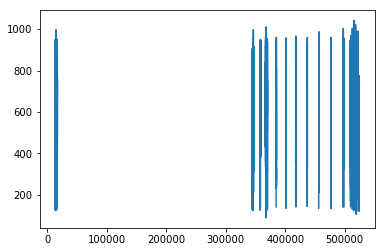

In [22]:
plt.plot(df['2A CYL 8 EXHAUST TEMP'])

In [23]:
from sklearn.preprocessing import Imputer
imp = Imputer(missing_values='NaN', strategy='mean', axis=0)
X = imp.fit_transform(np.array(df.drop('Indicator', axis=1).drop('DateTime', axis=1), 'float'))
X

array([[  38.09999847,  661.12915314,   93.60576539, ...,    0.        ,
          20.79705288,  143.65435511],
       [  38.09999847,  661.12915314,   93.60576539, ...,    0.        ,
          20.79705288,  143.65435511],
       [  22.39999962,  661.12915314,   93.60576539, ...,    0.        ,
          20.79705288,  143.65435511],
       ..., 
       [  23.2877552 ,  661.12915314,   93.60576539, ...,    0.        ,
          20.79705288,  143.65435511],
       [  23.2877552 ,  661.12915314,   93.60576539, ...,    0.        ,
          20.79705288,  143.65435511],
       [  23.2877552 ,  661.12915314,   93.60576539, ...,    0.        ,
          20.79705288,  143.65435511]])

In [24]:
from sklearn.decomposition import SparsePCA as PCA

pca = PCA(n_components=2)
pca.fit(X)

SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=2, n_jobs=1, random_state=None, ridge_alpha=0.01,
     tol=1e-08, verbose=False)

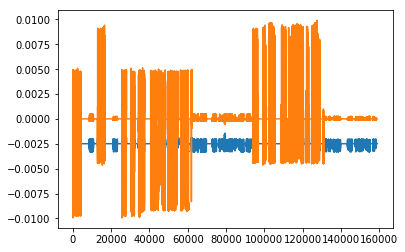

In [25]:
reduced_data = pca.transform(X)
plt.plot(reduced_data)

In [26]:

reduced_data

array([[ -2.02939959e-03,   3.82131759e-03],
       [ -1.92548114e-03,   4.51266923e-03],
       [ -1.86156273e-03,   4.94723253e-03],
       ..., 
       [ -2.48639768e-03,   6.89271527e-06],
       [ -2.48639768e-03,   6.89271527e-06],
       [ -2.48639768e-03,   6.89271527e-06]])

In [27]:
reduced_data.shape

(159014, 2)

In [29]:
reduced_data.transpose()


IndexError: index 2 is out of bounds for axis 1 with size 2